# Using XGBoost with Preprocessed Features for Wind Production

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from wattsquad.ml_logic import preproc
import matplotlib.pyplot as plt
from xgboost import XGBRegressor


### Importing and preprocessing data

In [2]:
train = pd.read_csv("../../raw_data/train.csv")

In [3]:
X_train_transformed = preproc.transform_data(train)

➡️ preprocessing done


In [4]:
test = pd.read_csv("../../raw_data/test.csv")

In [5]:
X_test_transformed = preproc.transform_data(test)

➡️ preprocessing done


In [6]:
y_train = train['wind_production']

In [7]:
y_test = test['wind_production']

### Creating X_val and y_val for wind production

In [8]:
# from sklearn.model_selection import train_test_split

# # Use the same function above for the validation set
# X_train_transformed, X_val, y_train, y_val = train_test_split(
#     X_train_transformed, y_train, test_size = 0.1, random_state = 42  # val = 10%
# )

In [9]:
# X_train_transformed

# XGBoost
## Setting up the model 

In [10]:
# # nb optimal values refer to solar

# # Initialize the model with the best parameters from grid search
# xgb_reg = XGBRegressor(
#     max_depth=7,                # Optimal value found
#     n_estimators=300,           # Optimal value found
#     learning_rate=0.05,         # Optimal value found
#     reg_alpha=0.05,             # Optimal value found
#     reg_lambda=20,              # Optimal value found
#     subsample=0.8,              # Optimal value found
#     colsample_bytree=0.8,       # Optimal value found
#     objective='reg:squarederror',
#     eval_metric="mae",
#     random_state=42             # Ensuring reproducibility
# )

# # Fit the model on the training data
# xgb_reg.fit(
#     X_train_transformed, 
#     y_train,
#     eval_set=[(X_train_transformed, y_train), (X_val, y_val)],
#     early_stopping_rounds=5     # Retain early stopping
# )

# # Make predictions
# y_pred = xgb_reg.predict(X_test_transformed) # predicted wind production

## Plotting best model forecasts vs. actual wind production

In [11]:
# plt.figure(figsize=(10, 6))  # Set the figure size

# # Plot the 'pv_forecast' column
# plt.plot(y_pred, label='Wind Forecast', color='blue', linestyle='-')

# # Plot the 'pv_production' column
# plt.plot(test['wind_production'], label='Wind Production', color='orange', linestyle='--')

# # Add labels, legend, and title
# plt.xlabel('Time (hours)')
# plt.ylabel('Wind production (kWh/h)')
# plt.title('Wind Forecast vs Wind Production')
# plt.legend()

# # Display the plot
# plt.show()

In [12]:
train["wind_production"].describe()

count    9515.000000
mean       21.254382
std        38.225468
min      -582.200000
25%        -0.260000
50%         2.370000
75%        26.040000
max       225.500000
Name: wind_production, dtype: float64

# The same but removing wind outliers before preprocessing

In [13]:
wind_train = train.copy()

In [14]:
wind_train.loc[wind_train["wind_production"] < -100, "wind_production"] = 21

In [15]:
wind_train["wind_production"].describe()

count    9515.000000
mean       21.379504
std        37.237138
min        -1.280000
25%        -0.260000
50%         2.380000
75%        26.040000
max       225.500000
Name: wind_production, dtype: float64

In [16]:
y_train = wind_train['wind_production']

In [17]:
len(X_train_transformed)

9515

In [18]:
# from sklearn.model_selection import train_test_split

# # Use the same function above for the validation set
# X_train_transformed, X_val, y_train, y_val = train_test_split(
#     X_train_transformed, y_train, test_size = 0.1, random_state = 42  # val = 10%
# )

In [19]:
# # nb optimal values refer to solar

# # Initialize the model with the best parameters from grid search
# xgb_reg = XGBRegressor(
#     max_depth=7,                # Optimal value found
#     n_estimators=300,           # Optimal value found
#     learning_rate=0.05,         # Optimal value found
#     reg_alpha=0.05,             # Optimal value found
#     reg_lambda=20,              # Optimal value found
#     subsample=0.8,              # Optimal value found
#     colsample_bytree=0.8,       # Optimal value found
#     objective='reg:squarederror',
#     eval_metric="mae",
#     random_state=42             # Ensuring reproducibility
# )

# # Fit the model on the training data
# xgb_reg.fit(
#     X_train_transformed, 
#     y_train,
#     eval_set=[(X_train_transformed, y_train), (X_val, y_val)],
#     early_stopping_rounds=20     # Retain early stopping
# )

# # Make predictions
# y_pred = xgb_reg.predict(X_test_transformed) # predicted wind production

In [20]:
# plt.figure(figsize=(10, 6))  # Set the figure size

# # Plot the 'pv_forecast' column
# plt.plot(y_pred, label='Wind Forecast', color='blue', linestyle='-')

# # Plot the 'pv_production' column
# plt.plot(test['wind_production'], label='Wind Production', color='orange', linestyle='--')

# # Add labels, legend, and title
# plt.xlabel('Time (hours)')
# plt.ylabel('Wind production (kWh/h)')
# plt.title('Wind Forecast vs Wind Production')
# plt.legend()

# # Display the plot
# plt.show()

<Axes: xlabel='wind_production', ylabel='Count'>

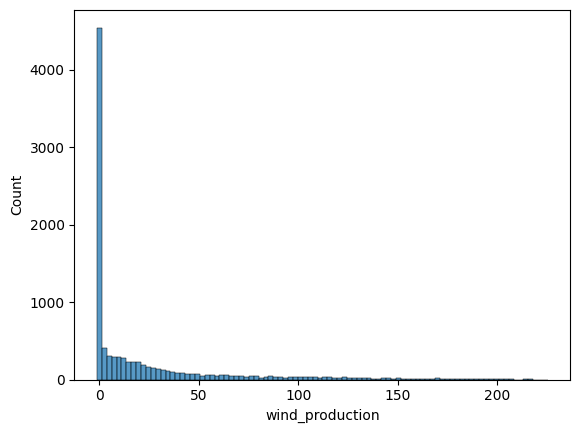

In [21]:
sns.histplot(data=y_train)

In [22]:
y_log = np.log(y_train + 1e-5)

/home/emilymco/.pyenv/versions/3.10.6/envs/watt_squad/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='wind_production', ylabel='Count'>

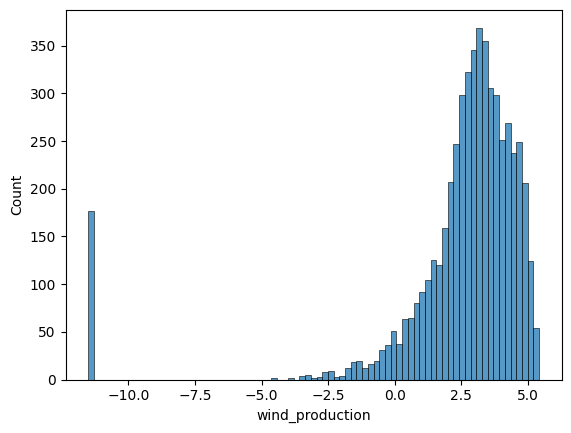

In [23]:
sns.histplot(data=y_log)

In [24]:
from sklearn.model_selection import train_test_split

# Use the same function above for the validation set
X_train_transformed, X_val, y_log, y_val = train_test_split(
    X_train_transformed, y_log, test_size = 0.1, random_state = 42  # val = 10%
)

In [25]:
# nb optimal values refer to solar

# Initialize the model with the best parameters from grid search
xgb_reg = XGBRegressor(
    max_depth=7,                # Optimal value found
    n_estimators=300,           # Optimal value found
    learning_rate=0.05,         # Optimal value found
    reg_alpha=0.05,             # Optimal value found
    reg_lambda=20,              # Optimal value found
    subsample=0.8,              # Optimal value found
    colsample_bytree=0.8,       # Optimal value found
    objective='reg:squarederror',
    eval_metric="mae",
    random_state=42             # Ensuring reproducibility
)

# Fit the model on the training data
xgb_reg.fit(
    X_train_transformed, 
    y_log,
    eval_set=[(X_train_transformed, y_log), (X_val, y_val)],
    early_stopping_rounds=10     # Retain early stopping
)

# Make predictions
y_pred = xgb_reg.predict(X_test_transformed) # predicted wind production

XGBoostError: [17:57:50] ../src/data/data.cc:458: Check failed: valid: Label contains NaN, infinity or a value too large.
Stack trace:
  [bt] (0) /home/emilymco/.pyenv/versions/3.10.6/envs/watt_squad/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x16b9c9) [0x7f79cd16b9c9]
  [bt] (1) /home/emilymco/.pyenv/versions/3.10.6/envs/watt_squad/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x178eb6) [0x7f79cd178eb6]
  [bt] (2) /home/emilymco/.pyenv/versions/3.10.6/envs/watt_squad/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x179d10) [0x7f79cd179d10]
  [bt] (3) /home/emilymco/.pyenv/versions/3.10.6/envs/watt_squad/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(XGDMatrixSetInfoFromInterface+0xa4) [0x7f79cd0bc754]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x7b16) [0x7f7a46e13b16]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x43ef) [0x7f7a46e103ef]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(ffi_call+0x12e) [0x7f7a46e130be]
  [bt] (7) /home/emilymco/.pyenv/versions/3.10.6/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x12847) [0x7f7a45d7e847]
  [bt] (8) /home/emilymco/.pyenv/versions/3.10.6/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xbfde) [0x7f7a45d77fde]

